# PROJECT TITLE: COVID-19 FAKE NEWS DETECTION MODEL

### Problem Statement:
Fake news intentionally persuades readers to accept biased or untrue beliefs by changing the way people interpret and respond to real news. The process of detecting fake news manually is relatively tedious, hence there is a need to leverage Machine Learning classifiers for this task. Due to its novelty, there are no standardised datasets for fake COVID-19 news detection as existing datasets are either not robust or recent enough for building models to accurately classify COVID-19 news. For instance, Patwa et al., (2020), benchmarked a dataset consisting of 10,700 social media posts and articles that were obtained majorly from sources such as WHO, CDC, Covid India Seva, and Indian Council of Medical Research (ICMR). This leaves out news obtainable from local sources in Nigeria.

### Aim and Objectives:
This study aims to detect fake COVID-19 news using Machine Learning classification baseline algorithms. This will be achieved through the following objectives:
1. To scrape verified Twitter handle of health organisations such as WHO, CDC, NCDC using Twitter API for COVID-19 related news and generate data.
2. To preprocess the obtained data using Python libraries such as NumPy, Pandas, and Seaborn.
3. To use Support Vector Machine (SVM), Logistic Regression, and Decision Tree Machine Learning algorithms for the classification of fake news.
4. To compare the performance of these algorithms using the Confusion Matrix and Classification Accuracy performance metrics.

### Importing Python Libraries

In [2]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn import model_selection, svm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn import tree
import numpy as np
import itertools

### Function for plotting Confusion Matrix

In [3]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

### Importing Datasets
- Train: The set of data used for learning, that is, to fit the parameters of the classifier. The model sees and learns from the Train data.
- Valid: The set of data - a fragment of Train data - used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.
- Test: The set of examples - a percentage of original data - used only to assess the performance of a fully-specified classifier. It gives an unbiased evaluation of the model and is used when the model is completely trained.

In [6]:
Train = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Train_Data.csv')
Valid = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Validation_Data.csv')
Test = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Test_Data.csv')

In [7]:
Train['tweet'] = Train['tweet'].map(lambda x: cleantext(x))
Valid['tweet'] = Valid['tweet'].map(lambda x: cleantext(x))
Test['tweet'] = Test['tweet'].map(lambda x: cleantext(x))

### Data Preprocessing - Handling Stopwords

In [23]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

### Data Preprocessing - Handling Stopwords

### Function Definition for Performance Metrics

In [8]:
def print_metrics(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ", accuracy_score(pred,true))
    print("Precison : ", precision_score(pred,true, average = 'weighted'))
    print("Recall : ", recall_score(pred,true, average = 'weighted'))
    print("F1 : ", f1_score(pred,true, average = 'weighted'))

In [73]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=1, gamma='auto')

### Support Vector Machine Implementation

SVM
Validation:
[[ 981   85]
 [ 118 1043]]
              precision    recall  f1-score   support

        fake       0.89      0.92      0.91      1066
        real       0.92      0.90      0.91      1161

    accuracy                           0.91      2227
   macro avg       0.91      0.91      0.91      2227
weighted avg       0.91      0.91      0.91      2227

Accuracy :  0.9088459811405478
Precison :  0.9091704863427963
Recall :  0.9088459811405478
F1 :  0.9088083473679036


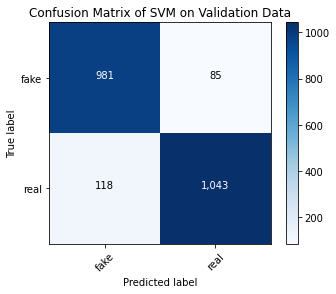

In [20]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(Train['tweet'],Train['label'])
print('SVM')
print ('Validation:')
prediction = pipeline.predict(Valid['tweet'])
print_metrics(prediction, Valid['label'])

plot_confusion_matrix(confusion_matrix(Valid['label'],prediction),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion Matrix of SVM on Validation Data')

#val_ori = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Validation_Data.csv')
#svm_val_misclass_df = val_ori[pred!=Valid['label']]

### Logistic Regression Model Implementation

Logistic Regression
Validation:
[[ 986   80]
 [ 140 1021]]
              precision    recall  f1-score   support

        fake       0.88      0.92      0.90      1066
        real       0.93      0.88      0.90      1161

    accuracy                           0.90      2227
   macro avg       0.90      0.90      0.90      2227
weighted avg       0.90      0.90      0.90      2227

Accuracy :  0.9012123933542883
Precison :  0.9024393030354517
Recall :  0.9012123933542883
F1 :  0.9011705536498337


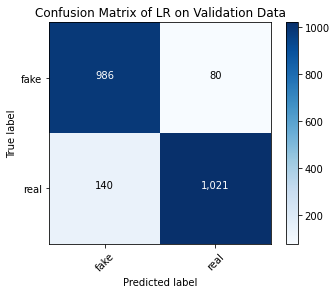

In [21]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(Train['tweet'], Train['label'])
print('Logistic Regression')
print ('Validation:')
prediction = pipeline.predict(Valid['tweet'])

print_metrics(prediction,Valid['label'])
plot_confusion_matrix(confusion_matrix(Valid['label'],prediction),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion Matrix of LR on Validation Data')

### Decision Tress Model Implementation

Decision Tree
Validation:
[[878 188]
 [184 977]]
              precision    recall  f1-score   support

        fake       0.83      0.82      0.83      1066
        real       0.84      0.84      0.84      1161

    accuracy                           0.83      2227
   macro avg       0.83      0.83      0.83      2227
weighted avg       0.83      0.83      0.83      2227

Accuracy :  0.8329591378536148
Precison :  0.83299124590872
Recall :  0.8329591378536148
F1 :  0.8329725018569317


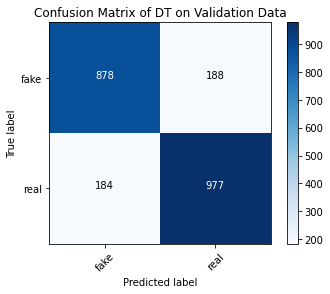

In [22]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(Train['tweet'],Train['label'])
print('Decision Tree')
print ('Validation:')
prediction = pipeline.predict(Valid['tweet'])

print_metrics(prediction, Valid['label'])
plot_confusion_matrix(confusion_matrix(Valid['label'], prediction),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion Matrix of DT on Validation Data')

In [16]:
#svm_val_misclass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 1 to 2173
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      164 non-null    int64 
 1   tweet   164 non-null    object
 2   label   164 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


In [13]:
#svm_val_misclass_df.to_excel('svm_val_misclassified.xlsx')